### 

Using the package quantmod download S&P500 index price data covering a period of your choice that spans at least 1000 observations. Use daily data.
For each of your answers below you will need to:
- Show the 1-liner code responsible for the output
- Write the respective mathematical equation i.e., for log-returns and/or for the
ARIMA model fit
- Explain any hypothesis testing: (i) What is the underlying hypothesis test null and
alternative hypothesis, (ii) comment on the p-values - Display plots, with caption and explanation
- Display plots, with caption and explanation

####  

- First, we we need to load our required packages using  ```library()``` command. In this case we need to extract 3 packages ```stats``` , ```quantmod``` and ```fpp2```.
loading fpp2 package will also load forecast and ggplot2 packages.
- Second, we need to load our dataset. I  choose google daily prices with ```GOOG``` symbol.<br>
 The``` S&P 500``` is a stock market index that measures the stock performance of
500 large companies on stock exchanges in the United States.
 We can access to these list of companies on stock exchange using ```quantmod``` package. <br>
```quantmod``` package works with different sources, like yahoo, google, ... <br>
 We use ```getSymbols()``` function for downloading this stocks prices. changing ```src =``` in getSymbols function can download our data from different sources. default is yahoo, we leave it like that.<br>
 we can also choose period of data set we need by setting the date using ```from = ``` and ```to = ``` in getSymbols function. We need we need only 1000 observation or a little more as question asked.
 - Third, downloading the dataset we need to prepare our time series. <br>
We need to make sure if the indices are Date or not, we can check using ```class()``` function, here our data is by Date.
Luckily the price downloaded from quantmod packages are ```xts```, ```zoo``` object, so we don't need to make any change.<br>
- Forth, this step is Preliminary Analysis, one need to plot the time series to get an idea from it and investigating the informations, checking the trend , checking the seasonality.

- Finally we can start to answer each part of the question , I will explain each part of the question in relevent part.


The code below illustrates the output.

In [77]:
# load the forecasting package
# install.packages("quantmod")
# install.packages("fpp2")
# install.packages("ggplot2")

library(fpp2) # it comes with forecast and ggplot2 packages in Rstudio.
library(quantmod)

In [78]:
# Load the data
# we need only 1000 observation or a little more as question asked to do so.

quantmod::getSymbols("GOOG", from='2015-01-01', to = '2020-11-23')  #1484 observation.

Y = Op(GOOG)

[1] "GOOG"

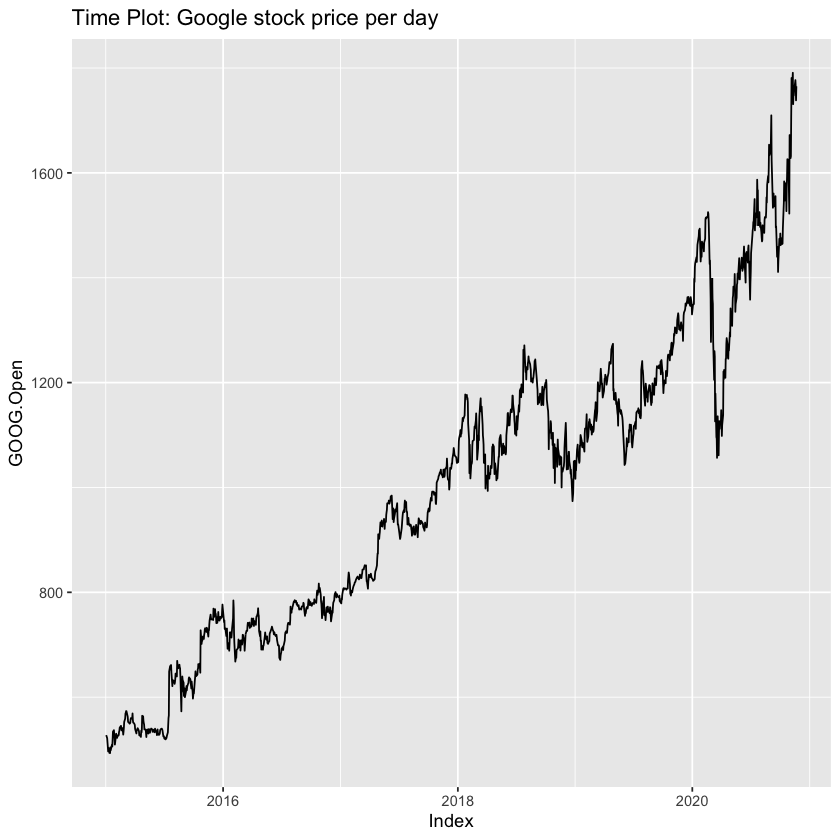

In [79]:
# Preliminary Analysis
# Time plot
autoplot(Y)+
  ggtitle("Time Plot: Google stock price per day")

#### Comments

- Data has a strong trend . Investigate transformations.
- I don't see any possible seasonality in Data.
- Take the first difference of the data will remove the trend.
- log(diff()) of our data will give us the log return. wich will be detrend.

-------

## (i) 
Subset the time series and reserve for out-of-sample the last 10 observations.<br>
In this step I will divide my data to two sets, one set is ```Training set``` and another is ```Test set```.<br>
Training set is the part our dataset, which we fit are model in this part.<br>
Test set will be used to check if our predicted series which obtained from our training set working well or not.<br>
We can check our error from residual of our prediction and our test set . <br>
The prediction and test set has the same time span , both are 10 observation in this case.<br>
After fitting our model in our training set and predicting 10 observation compare them.<br>
Our Data is daily and we want to predict 10 observation. So we need to set our Test set to last 10 observation, the reason we are doing this because we the time span for the test set and prediction need to be the same.<br>
For doing this first we need to check tail of our datset using the ```tail()``` command.<br>

The code below illustrates the output.

In [80]:
tail(Y, 10) # last 10 observation in our time series.

           GOOG.Open
2020-11-09   1790.90
2020-11-10   1731.09
2020-11-11   1750.00
2020-11-12   1747.63
2020-11-13   1757.63
2020-11-16   1771.70
2020-11-17   1776.94
2020-11-18   1765.23
2020-11-19   1738.38
2020-11-20   1765.21

As wee can see in the table above , the last 10 observation satrts from 2020-11-09. we need subset our dataset in this time.

In [81]:
# Y
Y_train = Y['::2020-11-09']
Y_test = Y['2020-11-09::']

In [82]:
dim(Y_test)

[1] 10  1

-----

## (ii) 
Transform your series to log-returns

- First : We can get return from our data using ```ret = diff(log(Y))``` or using ```quantmod::periodReturn()``` function.<br>
Both do the same job, here I want to use``` periodReturn()``` from quantmod package.<br>
In ``` periodReturn()``` we need to define ```period =``` and ```type = ```.<br>
Our time series period is daily ,and we need daily data observations in next steps so we define our ```period``` as a daily period.<br> 
And we need to get the log from our time series. So we define the ```type``` of function log here.
- Second: We want to plot our time series to have primary survey in our time series. I will do that using ```autoplot()``` function in ```ggplot2``` package.
- Finaly: I will subset my return dataset as well, so I can continue rest of the way with 2 time series alongside each other.<br>
First time series is ```Y``` which is the orginal dataset without any further action on it, like stantiory ,detrending or any other .It consists of ```Y_train``` which is the train part of time series Y, and  ```Y_test``` which is the test part of time series Y.<br> 
Second time series is ```Y_ret``` which is diff(log(Y)).It consists of ```ret_train``` which is the train part of time series Y_ret, and  ```ret_test``` which is the test part of time series Y_ret.<br>

The reason for doing this to see at the end of the question which model auto.arima will suggest for each of these time series.

The code below illustrates the output.


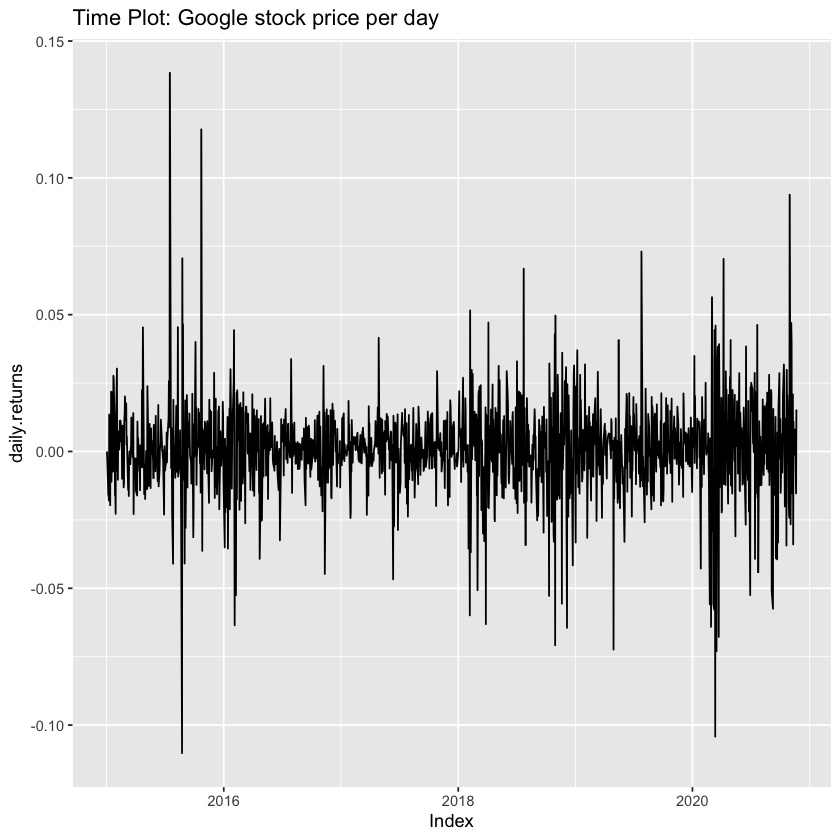

In [83]:
# log return
Y_ret = quantmod::periodReturn(Y, period = "daily", type= "log")

# plot
autoplot(Y_ret)+
  ggtitle("Time Plot: Google stock price per day")

# Y_ret
# subsetting my ret time series
ret_train = Y_ret['::2020-11-09']
ret_test = Y_ret['2020-11-09::']

-----

## (iii) 
Examine the ACF and PACF functions

In this step I want to plot ```ACF``` and ```PACF``` to see if I see any significant correlation,
This step also will help us to choose our model wisely. It can also help us to have an idea for their variables for our models to fit.<br>
ACF and PACF can help us to identify if our time series stationary or not, they can also can help us to identify our MA and AR model lags correlations.<br>
We normaly use ACF to identify the correlation in MA model, and PACF as it is direct correlation between lages can help us to identify the lag correlation in our AR model.<br>
- First, using ```acf()``` function in ```stats``` library we can see the acf plot for the time series. 
- Then,  ```acf()``` function in ```stats``` library can help us with the pacf plot of the time series.

The code below illustrates the output.

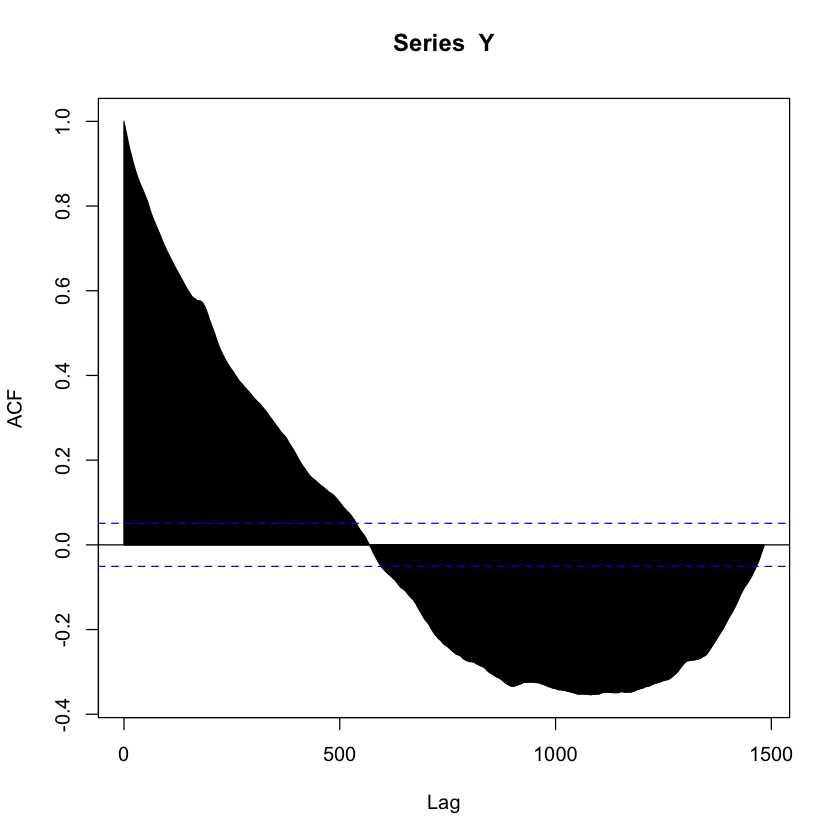

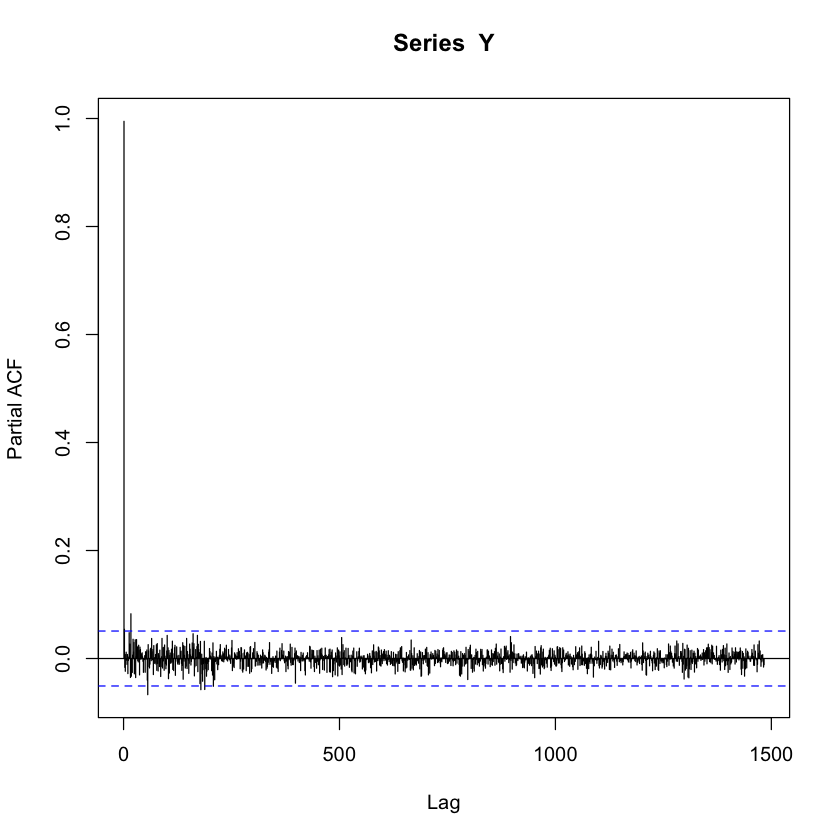

In [84]:
# Y
acf(Y, lag.max = length(Y)) 
# the signal is not stationary (since later lags is exceed the confidence interval).
pacf(Y, lag.max = length(Y))

#### Comments
AS we can see in the plot above,the time series```Y``` is non stationary and it has Trend. We can identify this by looking at ACF plot, we can see every lag has nice correlation together and lag by lag  smoothly this corelations are becoming less and less untill they pas zero and then again in minus they show the same procedure . It means the time series has dependence with time or has serial correlation .<br> 
PACF show us only some correcelation in the beginning lags of the PACF, which we will identify in the next steps.<br>
One needs to know that the first one is the correlation with itself.<br>
What I guess? <br>
In this case we can use ```ARIMA``` model, because ```ARIMA``` model is useful with this type of time series like ```Y``` which has trend and non seasonal. So we do not need to take the first difference to take out the trend.<br>
If are time series has trend and also has seasonal  , we can use ```SARIMA``` model , which we will not discuss in here.<br>
we could also use AR or ARMA model if we make our time series stationary before training our model. Which in this case we have ```Y_ret``` here, as you can see below. 
I leave my Y time series non statiory and see what will happen.<br>


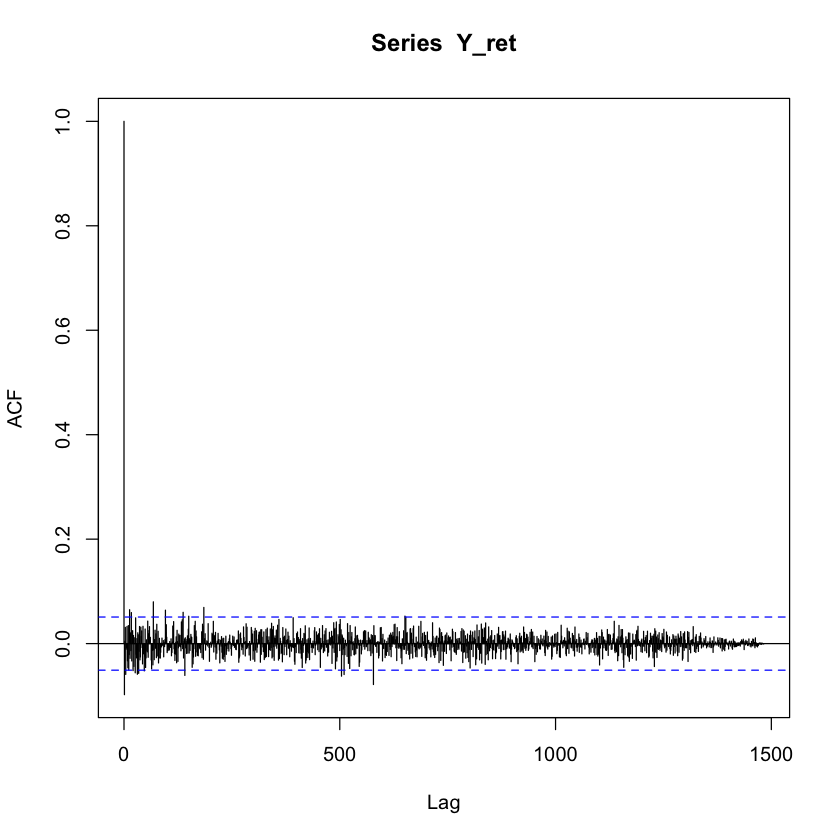

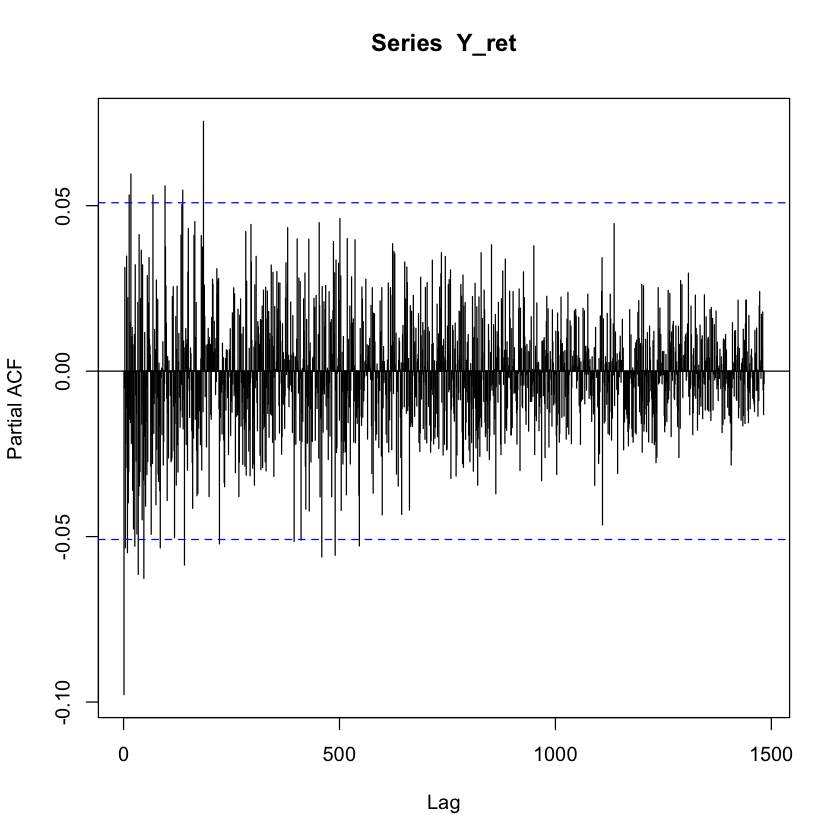

In [85]:
# Y_ret
acf(Y_ret, lag.max = length(Y_ret))   
# the signal is stationary (since later lags isn't exceed the confidence interval).
pacf(Y_ret, lag.max = length(Y_ret))

#### Comments
As my time series ```Y_ret``` is stationary and it has no Trend and variance also looks constant.<br>
In ```ACF``` and ```PACF``` plot we can see a bit correlation in the beginning, and in the middle, rest of the lags are inside of the  Confidence Interval or ```CI``` , Which they count as a zero correlation. 
In here also we can use ```ARIMA(p,d,q)``` model , but ```d``` will be equal to zero, as the time series Y_ret already took the first difference from the model.Which is the same as MA()or AR() model, we will see in the next steps.

Let's plot them together for sake of better view and guessing.<br>
These tiype of plots as it includes only some las lags we can see more more precisely, which is good to choose our model by visualizing.<br>

The code below illustrates the output.

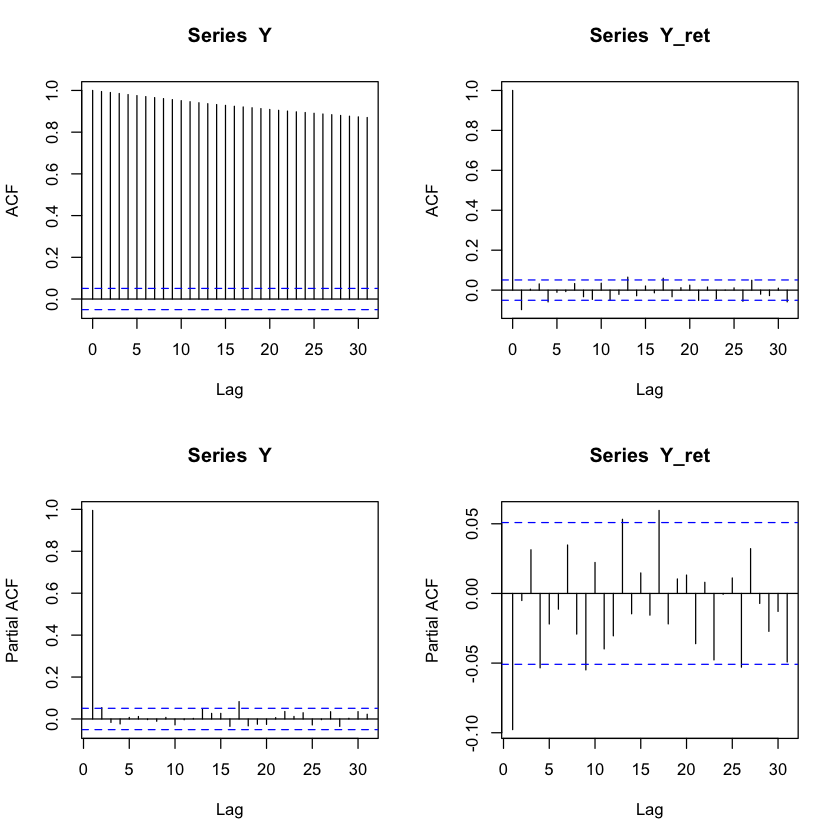

In [86]:
# Y & Y_ret
plot.new()
frame()
par(mfcol=c(2,2))
acf(Y)
pacf(Y)
acf(Y_ret)
pacf(Y_ret)

#### Comments

- By looking at ACF and PACF for time series Y_ret :
The reason I chose MA(1) is ACF plot for ```Y_ret``` which has a bit correlation with first lag.<br> 
I can't see any other Autocorrelation. For Ma( ) part  I only see the correlation in lag(1) and maybe a bit in lag(16) which is costly for us to fit in lag(16).<br>
For AR() part, looking at ACF plot for ```Y_ret```  I can see abit of correlation with lag(3) and lag(8).<br> 
- By looking at ACF and PACF for time series Y :
I don't really see anything in in ACF , and I see just a bit of correlation in lag(17).<br>
So from here actully we can realise as our time series ```Y``` is not stationary and maybe not normalized,also is not giving us good information. The information ```auto.arima()``` can find from time series ```Y``` , is because auto.armia automaticaly make the plot stationary by taking the difference, and showing the d equal with non zero number, which is the number of differences needed to make the time series stationary.<br>

As I see in the plots above for ```Y``` and ```Y_ret``` time series, I guess ```auto.arima()``` function which we will use in the next steps will end up with ```ARIMA(0,0,1)``` or ```MA(1)``` for time series ```Y_ret```. As Y and Y_ret actually are the same data, that would be Arima(0,1,1)  model for time series ```Y```. <br>


-----------

# (iv) 
Perform the Ljung-Box test and describe the test-hypothesis and report/comment on the result.

The ```Ljung-Box``` test examines whether there is significant evidence for non-zero correlations at given lags, with the null hypothesis of independence in a given time series(a non-stationary will have a low p-value).<br>
We can do this using ```Box.test()``` function in ```stats``` package and define teh ```type=``` 'Ljung-Box'.

The code below illustrates the output.

In [87]:
# Ljung-Box test

# Y
Box.test(Y, type = 'Ljung-Box')

# Y_ret
Box.test(Y_ret, type = 'Ljung-Box')


	Box-Ljung test

data:  Y
X-squared = 1471.4, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  Y_ret
X-squared = 14.214, df = 1, p-value = 0.0001631


#### Comments
Ljung-Box test above shows us the P-value for both ```Y``` and ```Y_ret```  are ```less than 0.05```. <br>
Conventionally , a P-value less than 0.05 rejecting the null hypothesis ${H_0}$ and accept the Alternative hypothesis${H_1}$.<br>
As we know in Ljung-Box test the null hypothesis ${H_0}$ is stationary. So the P-value less than 0.05 rejecting the ${H_0}$.As a result   ```Y``` and  ```Y_return``` both are non-stationary  regarding Ljung-Box test, which is not correct.
We need to examin another test in the time series, as the plotting the AC and PAC in section (iii) showed me different result. 

------------

## (v) 
Check the data for stationarity using the correct test statistic and comment on the output.

We have different types of stationary test, some of them are:
-  ```Dicky fuller``` test, to see if it's stationary or not, using ```tseries::adf.test(Y)```. 
-  ```Box.test```test  using Box.test(Y, 1400, type="Ljung-Box").  
-  We can also use ```ACF``` for stationarity test, which I did in section (iii).
- ...
We already did ```Ljung-Box``` in part (iv),<br>
In this test it identifyed both time series ```Y``` and ```Y_ret``` non-stationary.
I also did ```ACF``` test in part (iii),<br>
In this test after plotting the AC and PAC for my time series ```Y``` and ```Y_ret```I have seen that ```Y``` is non-stationary and ```Y_ ret``` is stationary.<br>
So let try ```Dicky fuller``` test as well.<br>
We can do this using ```adf.test()``` function in ```tseries``` package , the null hypothesis${H_0}$ for this test is the data is non-stationary. and to reject the null hypothesis${H_0}$ ,we want p-value of less than 0.05(or smaller). 

The code below illustrates the output.

In [89]:
# Augmented Dicky-Fuller test

# Y
tseries::adf.test(Y)

# Y_ret
tseries::adf.test(Y_ret)


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -3.5048, Lag order = 11, p-value = 0.04183
alternative hypothesis: stationary


Warning message in tseries::adf.test(Y_ret):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  Y_ret
Dickey-Fuller = -12.412, Lag order = 11, p-value = 0.01
alternative hypothesis: stationary


#### Comments
Augmented Dickey-Fuller test above shows us the P-value for both ```Y``` and ```Y_ret```  are ```less than 0.05```. <br>
Conventionally , a P-value less than 0.05 rejecting the null hypothesis ${H_0}$ and accept the Alternative hypothesis${H_1}$.<br>
As we know in ADF test the null hypothesis${H_0}$  is non-stationary. So the P-value less than 0.05 rejecting the ${H_0}$.As a result   ```Y``` and  ```Y_return``` both are stationary  regarding ADF test, which again is not correct.

#### Result

For a stationary signal,we expect no dependence with time, we would expect the ACF to go to 0 for each time lag(τ).
So the best test in these time series for finding our time series is stationary or not , is ACF test , which give us the right answer.

Let's plot them side by side to have better view,

The code below illustrates the output.

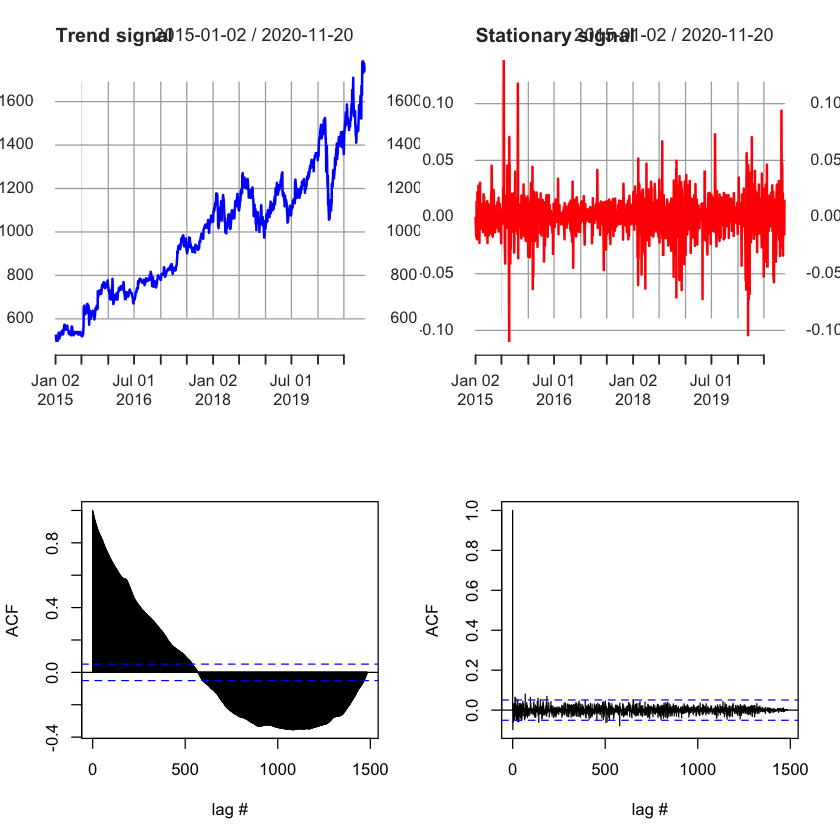

In [90]:
# the stationary signal and ACF:
# Y & Y_ret
plot.new()
frame()
par(mfcol=c(2,2))

plot(Y,
     type='l',col='blue',
     xlab = "time (t)",
     ylab = "Y(t)",
     main = "Trend signal")
acf(Y,lag.max = length(Y),
    xlab = "lag #", ylab = 'ACF',main=' ')
# the trend signal and ACF
plot(Y_ret,
     type='l',col='red',
     xlab = "time (t)",
     ylab = "Y(t)",
     main = "Stationary signal")
acf(Y_ret,lag.max = length(Y_ret),
    xlab = "lag #", ylab = 'ACF', main=' ')

#### Commments
Even by looking at time series plot we can see that ACF is a good choise for identifying whether the time series is stationary or not.

------

# (vi) 
Perform a normality test of your choice on the return series and report the output.

Let's first do the data visualisation in our data ```Y``` and ```Y_ret```  with histogram and QQplot.
- For histogram we can use ```hist()``` function and for qqplot we can use ```qqline()``` function.

The code below illustrates the output.

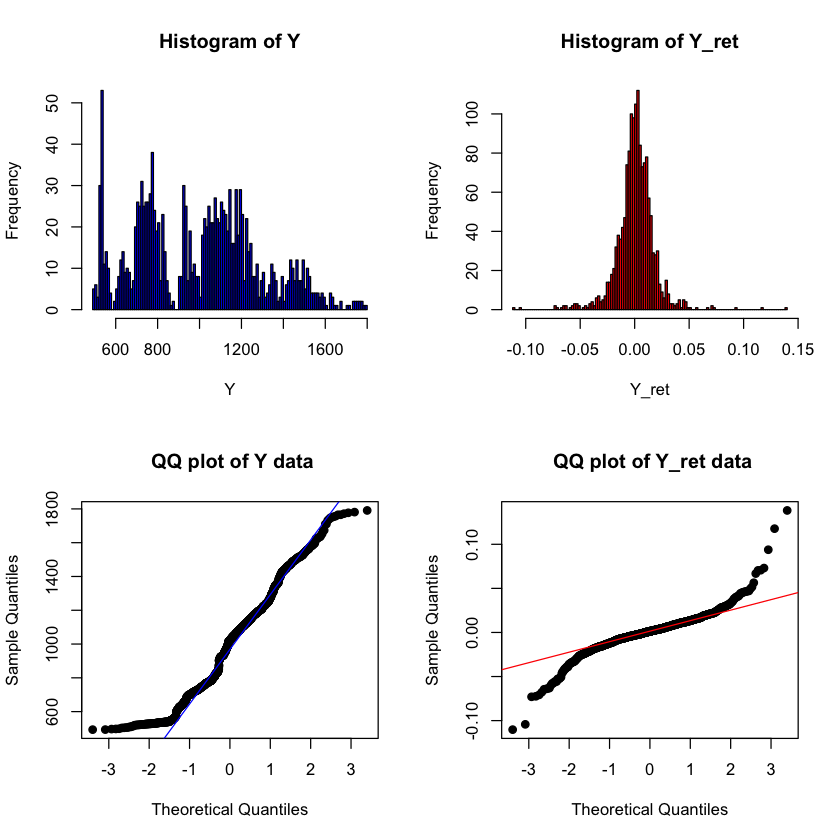

In [91]:
plot.new()
frame()
par(mfcol=c(2,2))

# Y
hist(Y, 100, col = "blue")

qqnorm(Y, main = " QQ plot of Y data", pch = 19)
qqline(Y, col = "blue")

# Y_ret
hist(Y_ret, 100, col = "red")

qqnorm(Y_ret, main = " QQ plot of Y_ret data", pch = 19)
qqline(Y_ret, col = "red")


#### Comments
As we can see above both  dataset ```Y``` and ```Y_ret``` are not normally distributed.
Let's also for robust decision test our normality with the functions that we have in the ```nortest packages```.

--------

Functions in nortest package for normality test include:
- Lilliefors test (lillie.test)
- Anderson_Darling test (ad.test)
- Shapiro-Francia test (sf.test)

The null hypothesis ${H_0}$ for all of the functions above saying that the data set is normal. ${H_0}$ = normality.

The code below illustrates the output.

In [92]:
# install.packages("nortest")
# Y
nortest::lillie.test(coredata(Y))  # we need to give coredata
nortest::ad.test(as.numeric(coredata(Y))) # we need to make sure is numeric
nortest::sf.test(Y)


# Y_ret
nortest::lillie.test(coredata(Y_ret))  # we need to give coredata
nortest::ad.test(as.numeric(coredata(Y_ret))) # we need to make sure is numeric
nortest::sf.test(Y_ret)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  coredata(Y)
D = 0.091729, p-value < 2.2e-16



	Anderson-Darling normality test

data:  as.numeric(coredata(Y))
A = 11.251, p-value < 2.2e-16



	Shapiro-Francia normality test

data:  Y
W = 0.92503, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  coredata(Y_ret)
D = 0.089631, p-value < 2.2e-16



	Anderson-Darling normality test

data:  as.numeric(coredata(Y_ret))
A = 24.382, p-value < 2.2e-16



	Shapiro-Francia normality test

data:  Y_ret
W = 6.1032e-05, p-value < 2.2e-16


#### Comments

As we can see the results of our test above saying that the p-value < 2.2e-16, which is significantly less than 0.05.<br>
the null hypothesis ${H_0}$  for all of these three tests saying that dataset is normal. ${H_0}$ = normality.<br>
So null hypothesis rejected and data is not normal.


###### I was just curious about this part , so I did it and added to my portfolio.

### Normalization 
##### Transformation
In this part I just want to try whether normalization in our ```Y``` and ```Y_ret``` time series will help us or not.<br>
our return daily dataset ```Y_ret``` is already so close to normal distribution, but I want to see if it can get better or even doing normalisation in my data will help me or not at all.

So let's check the normalisation of our time series ```Y``` and ```Y_t``` before fitting in our model.<br>
We have different way for normalising or transforming our datasets:
- ```Scale```: The scale transform calculates the standard deviation for an attribute and divides each value by that standard deviation. 

- ```Center```: The center transform calculates the mean for an attribute and subtracts it from each value.

- ```Standardise``` or Z score:  Combining the scale and center transforms will standardize your data. Attributes will have a mean value of 0 and a standard deviation of 1.

- ```Normalise```: Data values can be scaled into the range of [0, 1] which is called normalization.

- ```Box-Cox```: When an attribute has a Gaussian-like distribution but is shifted, this is called a skew. The distribution of an attribute can be shifted to reduce the skew and make it more Gaussian. The BoxCox transform can perform this operation (assumes all values are positive). 

- ```Yeo-Johnson```: Another power-transform like the Box-Cox transform, but it supports raw values that are equal to zero and negative.

Luckily all of these methods can be found in ```caret``` package.
- First: I nstalling the package using  ```install.packages()``` function.

- Second : Loading our package using ```library()``` function.

- Third: Preprocess the parameters using ```preProcess()``` function. In this method we should define our data and the method we want to use, we need to make sure our data is ```data.farme``` object. We can also choose our method as below:
For ```Scale``` method we can define like this  ```method = c("scale")``` .<br>  
For ```Center``` method we can define like this  ```method = c("center")``` .<br>  
For ```Standardise``` method we can define like this  ```method = c("center", "scale")``` .<br>  
For ```Normalise``` method we can define like this  ```method = c("range")``` .<br>  
For ```Box-Cox``` method we can define like this  ```method = c("BoxCox")``` .<br>  
For ```Yeo-Johnson``` method we can define like this  ```method = c("YeoJohnson")``` .<br> 

We can also putting it all together like ```method = c("center", "scale", "YeoJohnson")```.<br>

I tried all the method above in one cell and just change the method and compared.

- Forth: Plotting them in form of histogram and qqplot can give us good idea about transformation.<br>

Using ```hist()``` function we can have histogram of the time series <br> 

Using ```qqnorm()``` function we can have qqplot of the time series <br>

Using ```qqline()``` function we can have the line passing the qqplot of the  time series <br> 

Before plotting them using functions above we need to make sure our dataset is ```xts``` object.

The code below illustrates the output.

Created from 1484 samples and 2 variables

Pre-processing:
  - Yeo-Johnson transformation (1)
  - ignored (1)

Lambda estimates for Yeo-Johnson transformation:
0.45


      date              GOOG.Open    
 Min.   :2015-01-02   Min.   :33.40  
 1st Qu.:2016-06-22   1st Qu.:40.71  
 Median :2017-12-11   Median :47.06  
 Mean   :2017-12-12   Mean   :45.92  
 3rd Qu.:2019-06-05   3rd Qu.:50.45  
 Max.   :2020-11-20   Max.   :61.05  

Created from 1484 samples and 2 variables

Pre-processing:
  - Yeo-Johnson transformation (1)
  - ignored (1)

Lambda estimates for Yeo-Johnson transformation:
1.04


      date            daily.returns       
 Min.   :2015-01-02   Min.   :-0.1100264  
 1st Qu.:2016-06-22   1st Qu.:-0.0065490  
 Median :2017-12-11   Median : 0.0013341  
 Mean   :2017-12-12   Mean   : 0.0008191  
 3rd Qu.:2019-06-05   3rd Qu.: 0.0095406  
 Max.   :2020-11-20   Max.   : 0.1387272  

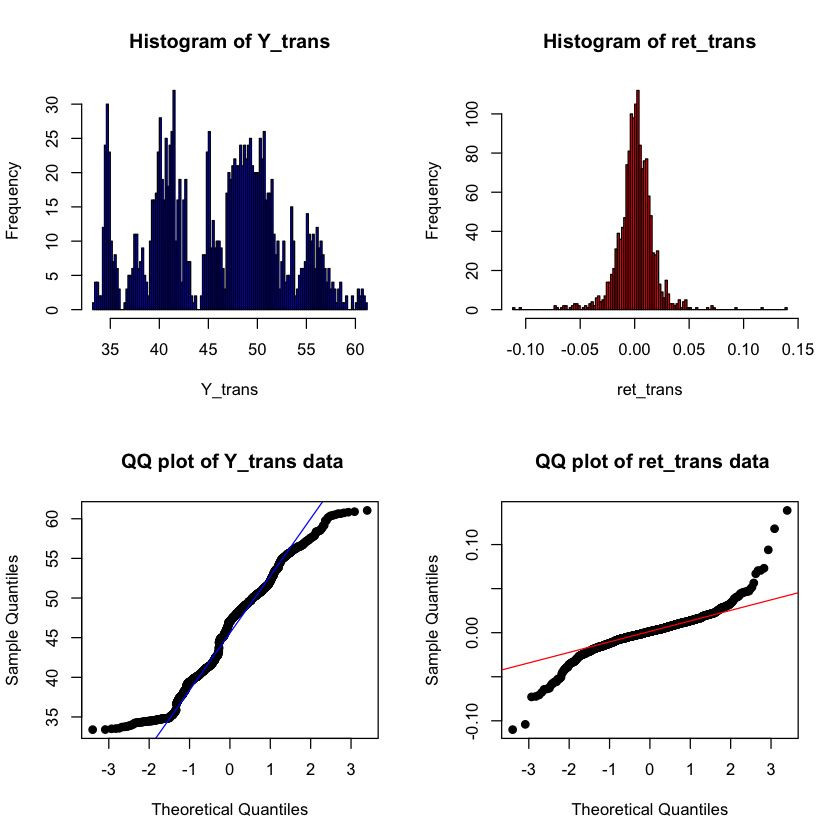

In [93]:
# install.packages('caret')
library(caret)

# Scale, Center, Standardise, Normalise, Box-Cox, Yeo-Johnson

# Y
# 1. calculate the pre-process parameters from the dataset
Y_preprocess = preProcess(data.frame(date=index(Y), coredata(Y)) , method=c("YeoJohnson"))
print(Y_preprocess)
# 2. transform the dataset using the parameters
Y_trans = predict(Y_preprocess, data.frame(date=index(Y), coredata(Y)))
summary(Y_trans)

# Y_ret
# 1. calculate the pre-process parameters from the dataset
ret_preprocess = preProcess(data.frame(date=index(Y_ret), coredata(Y_ret)) , method=c("YeoJohnson"))
print(ret_preprocess)
# 2. transform the dataset using the parameters
ret_trans = predict(ret_preprocess, data.frame(date=index(Y_ret), coredata(Y_ret)))
summary(ret_trans)

# head(ret_trans)
# head(Y_trans)

# xts object
Y_trans = xts(Y_trans$GOOG.Open, Y_trans$date)
ret_trans = xts(ret_trans$daily.returns, ret_trans$date)



plot.new()
frame()
par(mfcol=c(2,2))

# # If ones want to compare them with orginal data distribution on comment this
# par(mfcol=c(2,4))
# # Y
# hist(Y, 100, col = "blue")
# qqnorm(Y, main = " QQ plot of Y data", pch = 19)
# qqline(Y, col = "blue")

# # Y_ret
# hist(Y_ret, 100, col = "red")
# qqnorm(Y_ret, main = " QQ plot of Y_ret data", pch = 19)
# qqline(Y_ret, col = "red")


# Y_trans
hist(Y_trans, 100, col = "blue")
qqnorm(Y_trans, main = " QQ plot of Y_trans data", pch = 19)
qqline(Y_trans, col = "blue")

# ret_trans
hist(ret_trans, 100, col = "red")
qqnorm(ret_trans, main = " QQ plot of ret_trans data", pch = 19)
qqline(ret_trans, col = "red")

##### Comments

##### Disappointing

For all the transformation method above that I have tried, according to qqplot I can see that my orginal data is almost better than the transformed one, so transformation does't really worked in this dataset , so I will continue with my orginal dataset. 

##### Important:
##### In all the parts above, as  we don't need to change anything in our orginal Time series ```Y``` and my return Time series ```Y_ret```. If anything needed to be changed that changes must apply to our train time series ```Y_train``` and ```ret_train```, Because we want to fit our Train time series in to the model we choose. I just came till here with orginal time series for not defining many variables.

So from here I will continue with my Train time series ```Y_train``` and ```ret_train```.

---------

## (vii) 

Fit an ARIMA model and determine the correct lag order: Show the 1-liner codes for output.

For fitting the model we can use two different method :<br>

Manually :Using ```arima()``` function, In this method we need to define our model parameters ourselves.<br>
Auto :```auto.arima()``` function will choose the parameters.<br> 
Both of the function above are in ```forecast``` package and we need to install the package and load it after that as I explained many time before .<br>


Let's see how auto.arima( ) function works.<br>
The code below illustrates the output.

In [94]:
#fitting our training model Y_train and ret_train.
ret_fit = forecast::auto.arima(ret_train)    # Residual sd: sqrt(0.0002925) =  0.01710263
Y_fit = forecast::auto.arima(Y_train)

ret_fit
Y_fit

Series: ret_train 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1   mean
      -0.0951  8e-04
s.e.   0.0257  4e-04

sigma^2 estimated as 0.0002925:  log likelihood=3909.17
AIC=-7812.33   AICc=-7812.32   BIC=-7796.44

Series: Y_train 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1   drift
      -0.1100  0.8566
s.e.   0.0259  0.4276

sigma^2 estimated as 340.6:  log likelihood=-6387.76
AIC=12781.51   AICc=12781.53   BIC=12797.4

#### Comments

ret_fit: Using ```auto.arima()``` function returned us ```ARIMA(0,0,1)``` for our ```ret_train``` time series , which is what I gussed from plotting ```ACF``` and ```PACF``` MA(1). As we know ARIMA(0,0,1) = MA(1).

Y_fit: In similar way using  ```auto.arima()``` function returned us ```ARIMA(0,1,1)``` for our ```Y_train``` time series. The d = 1 in the middle indicates to our first difference.
If we wanted to make our time series statiory d here would be equal to 0.<br>

#### In stock prices we actually care about our return. So we need to predict our return. I was doing both just to compare the forecast plots in the end. 



Here as our model is MA(1) and has only one parameter we don't really need to do any further action for fixing our parameter,as this is the only tools that we have to predict the future stock prices. 
Let's just check it to see even this single parameter is helpful or not.
we do this using the ```confint()``` function in ```stats``` package.

In [95]:
# check if we need to fix our parameter
confint(ret_fit, level =.98)

,1 %,99 %
ma1,-0.1547952274,-0.035379015
intercept,-0.0001105272,0.001767106


#### Comments
non of the parameter contain 0 , so we can keep them

----------

# (viii) 

Report the coefficients for the chosen ARIMA model and show the respective equation given these coefficients.

We can find out the coefficients and intercept from auto.arima output which chosen ARIMA model is ARIMA(0,0,1) for our Return time series shows us ma1 = -0.0951  mean= 8e-04.<br>
We can also use head() function for our fitted model like below. Which shows ma1 = -0.0950871213507895 and  intercept = 0.000828289163514658.

In [96]:
head(ret_fit)

,ma1,intercept
ma1,6.587449e-04,7.636127e-09
intercept,7.636127e-09,1.628591e-07


The respective equation for it would be : $y_{t} = (0.0008) -0.095y_{t-1} + ε_{t}$
 
$ε_{t}$ is our error in our actual time.


----------

## (ix) 
The residuals from an ARIMA fit require that:
a. The residuals have zero mean 𝐸[𝑒!] = 0
b. Have a finite variance 𝑉𝑎𝑟[𝑒!] = 𝜎"
c. Have zero autocovariance 𝐸[𝑒!𝑒] = 0

- We can do the test of autocorrelation of thr residuals with ```Box.test()``` with ```fitdf``` adjusted for the number of parametes estimated in the fit .
- We can also use ```checkresiduals()``` function in the ```forecast``` package, which will automate this test and show some standard diagnostics plots.

Lets's try the second one

The code below illustrates the output.


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 14.977, df = 8, p-value = 0.0596

Model df: 2.   Total lags used: 10



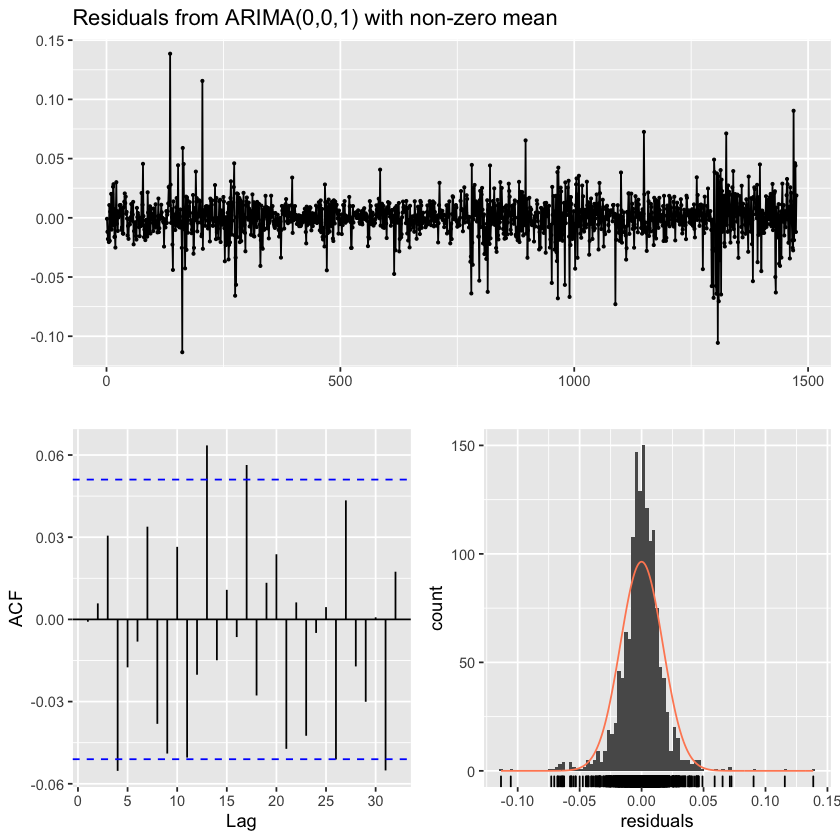


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1) with drift
Q* = 6.7342, df = 8, p-value = 0.5656

Model df: 2.   Total lags used: 10



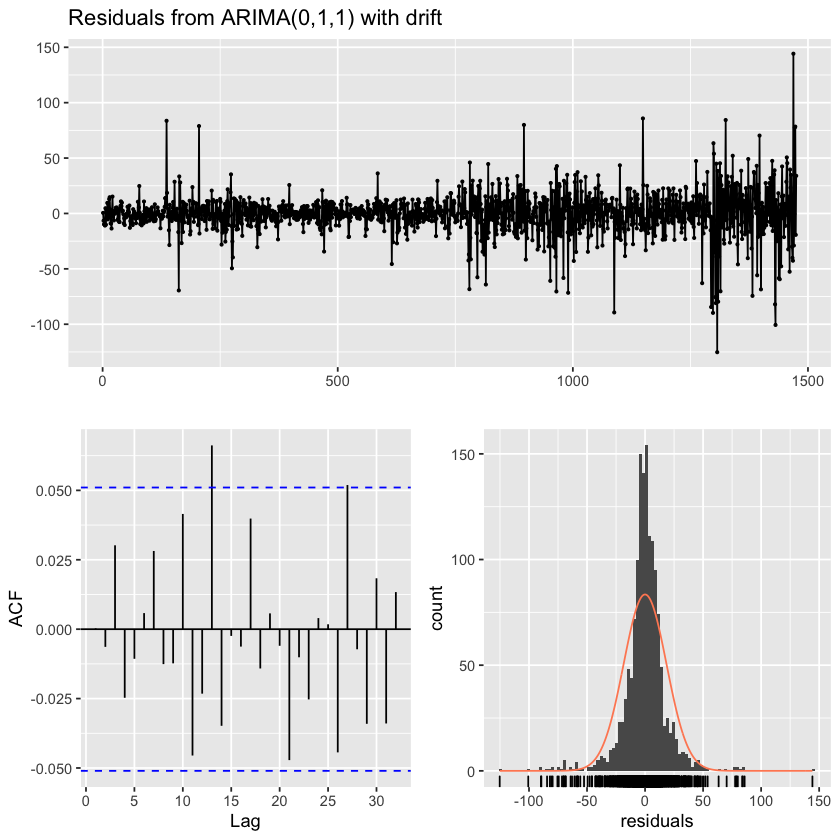

In [97]:
# Using the results from checkresiduals(fitted_model).

ret_res = forecast::checkresiduals(ret_fit) # residual of the return time series(train part) 

Y_res = forecast::checkresiduals(Y_fit) # residual of the orginal time series(train part) 

In [98]:
head(ret_fit)

,ma1,intercept
ma1,6.587449e-04,7.636127e-09
intercept,7.636127e-09,1.628591e-07


#### Comments 
The intresting part is, as we can see above that the residual for our time series Y_fit and ret_fit are exactly the same shape in the different scales , because they are the same datset.<br> 
Our residual doesn't really looks good.<br>
For being a good model the residual needs to be a white noise , which means need to have:
- a. The residuals have zero mean 𝐸[𝑒!] = 0
- b. Have a finite variance 𝑉𝑎𝑟[𝑒!] = 𝜎"
- c. Have zero autocovariance 𝐸[𝑒!𝑒] = 0

By looking at ACF and residual above, we still can see:<br>
We can see some autocorrilation between the lags, which is not what we are looking for.<br>
We don't also see finitive variance , is passing the confidence interval.<br>
But we have one of our condition which is zero mean.<br>

So our model is not good enough and can be better.

-------------------


## (x) 
Produce and plot the forecast using forecast(fitted_model).
Extract the forecast values and compare to the reserved out-of-sample data and compute the 𝑅" measure of fit on the forecast value.

- First: To forecast the time series we need to use ```forecast()``` function in forecast package.<br> 
Here we only wants to forecast 10 observation. So we need to define h equal to 10, Which is same as number of observation in the test set.<br>
- Finlay: We can plot the forecast time series using ```autoplot()``` function in ggplot2 package.

The code below illustrates the output.

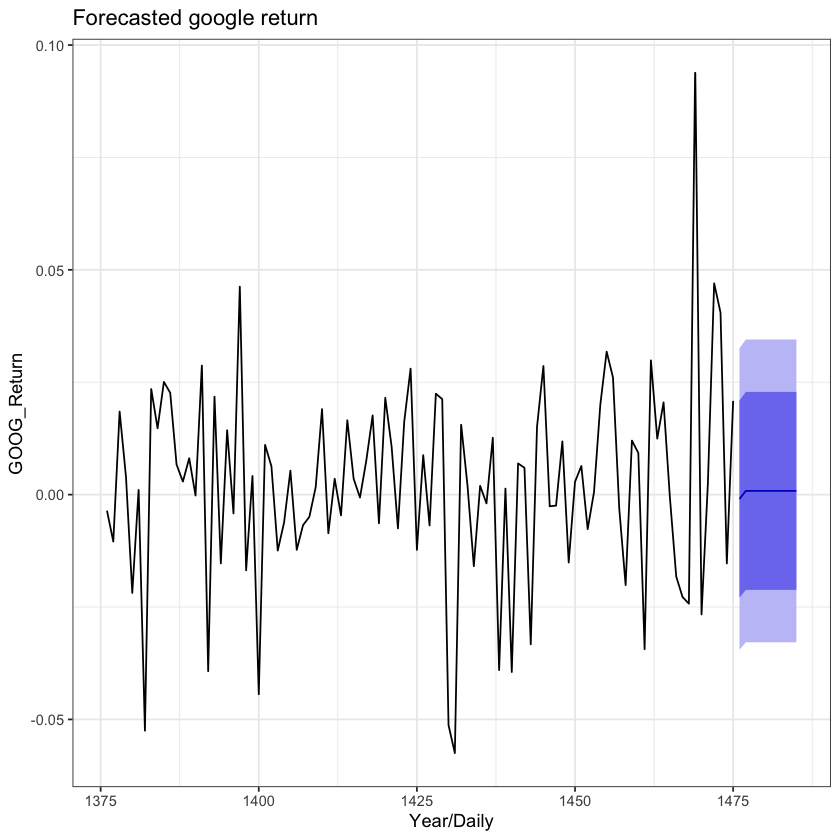

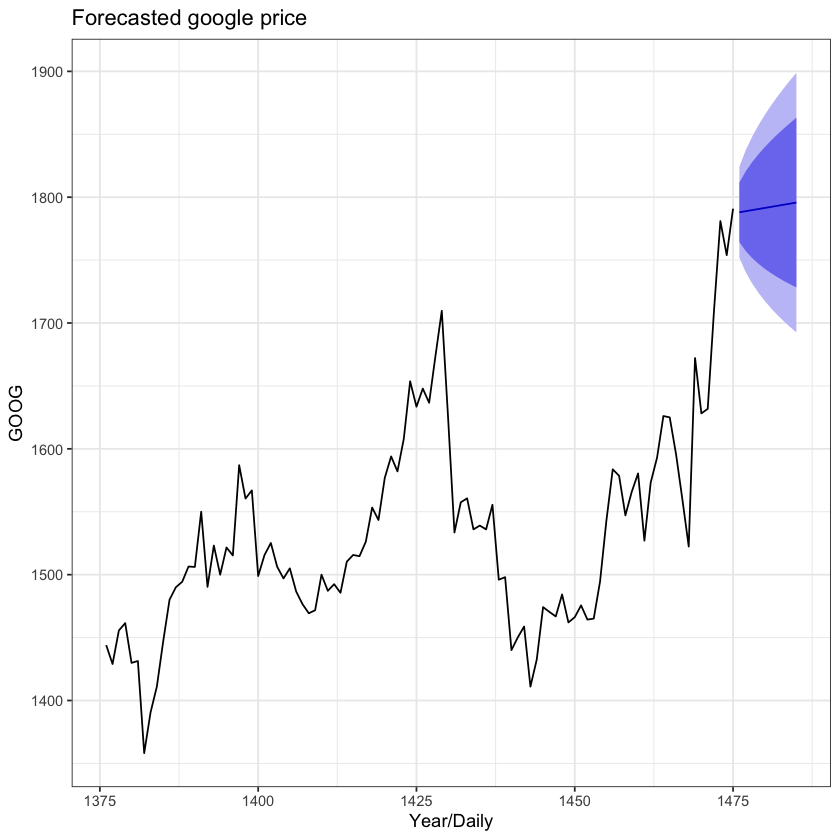

In [99]:
ret_forecast = forecast::forecast(ret_fit, h = 10) # h = nrow(ret_test)
ggplot2::autoplot(ret_forecast ,include = 100)+ # include = 100 for seeing last 100 observation(for bigger view)
            ylab("GOOG_Return")+           
            xlab("Year/Daily")+
            ggtitle("Forecasted google return")+
            theme_bw()

Y_forecast = forecast::forecast(Y_fit, h = 10)  # h = nrow(ret_test)
ggplot2::autoplot(Y_forecast,include = 100)+   # include = 100 for seeing last 100 observation(for bigger view)  
            ylab("GOOG")+            
            xlab("Year/Daily")+
            ggtitle("Forecasted google price")+
            theme_bw()

In [100]:
ret_forecast

     Point Forecast       Lo 80      Hi 80       Lo 95      Hi 95
1476  -0.0009673478 -0.02288475 0.02095005 -0.03448712 0.03255242
1477   0.0008282892 -0.02118797 0.02284455 -0.03284268 0.03449925
1478   0.0008282892 -0.02118797 0.02284455 -0.03284268 0.03449925
1479   0.0008282892 -0.02118797 0.02284455 -0.03284268 0.03449925
1480   0.0008282892 -0.02118797 0.02284455 -0.03284268 0.03449925
1481   0.0008282892 -0.02118797 0.02284455 -0.03284268 0.03449925
1482   0.0008282892 -0.02118797 0.02284455 -0.03284268 0.03449925
1483   0.0008282892 -0.02118797 0.02284455 -0.03284268 0.03449925
1484   0.0008282892 -0.02118797 0.02284455 -0.03284268 0.03449925
1485   0.0008282892 -0.02118797 0.02284455 -0.03284268 0.03449925

#### Comments 
As we can see in the plots and table above , our point forecast is blue line in the plot , also we have %80 and %95 confidence interval which they are dark purple(%80) and light purple(%95)

--------------

In this step we want to compare the forecast part and test set together by plotting them.<br>
As we can see above , forecast has 5 coloumn , which shows the forecast point and confidence intervals in different range of %80 and %95.<br>
For range of %80 we have low %80 and high %80.<br>
For range of %95 we have low %95 and high %95.<br>
for comparison we need to plot all of the forecast lines with our test time series in one overlying plot.<br>
For doing this I want to use ```ggplot()``` function, and ```geom_line()``` function<br> 
for plotting them by function ggplot() first we need to make sure both ret_forecast and and ret_test are a```xts``` or ```zoo``` object.
Then we can plot them.

The code below illustrates the output.

In [101]:
class(ret_test)
class(ret_forecast)

[1] "xts" "zoo"

[1] "forecast"

We need to make ret_forecast a xts object

In [102]:
# convert to data frame
ret_forecast = data.frame(ret_forecast)

# convert each colomn to xts object
date = index(ret_test)
point_data = xts(as.numeric(ret_forecast$Point.Forecast), as.Date(date))
HI80 = xts(as.numeric(ret_forecast$Hi.80), as.Date(date)) # data should be numeric and date should be Date object.
LO80 = xts(as.numeric(ret_forecast$Lo.80), as.Date(date))
HI95 = xts(as.numeric(ret_forecast$Hi.95), as.Date(date))
LO95 = xts(as.numeric(ret_forecast$Lo.95), as.Date(date))

class(point_data)

[1] "xts" "zoo"

In [103]:
ret_forecast$Hi.80

[1] 0.02095005 0.02284455 0.02284455 0.02284455 0.02284455 0.02284455
 [7] 0.02284455 0.02284455 0.02284455 0.02284455

Let's overlying two plots to see the difference more obvious.

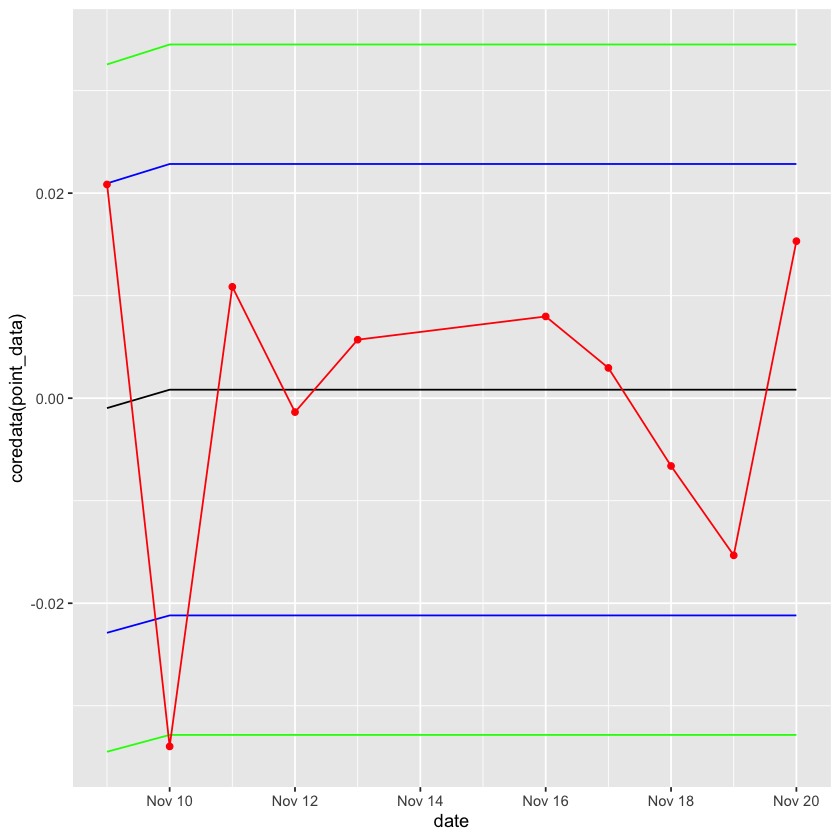

In [104]:
ggplot() +
  geom_line(data = point_data, aes(date, coredata(point_data)), color = "black") +
  geom_line(data = HI80, aes(date, coredata(HI80)), color = "blue") +
  geom_line(data = LO80, aes(date, coredata(LO80)), color = "blue") +
  geom_line(data = HI95, aes(date, coredata(HI95)), color = "green") +
  geom_line(data = LO95, aes(date, coredata(LO95)), color = "green") +
  geom_line(data = ret_test, aes(date, coredata(ret_test)), color = "red")+
  geom_point(data = ret_test, aes(date, coredata(ret_test)), color = "red")

#### Comments
In the plot above plot:
- Red line is the test set.
- Black line indicates forecast line.
- Blue lines indicate high and low for %80 confidence interval. Wich shows that % 80 the data would be in this range.
- Green lines indicate high and low for %95 confidence interval. Which shows that % 95 the data would be in this range.

OurARIMA(0,0,1)model for our return data was't bad but it coud be better which needs more research. 


------------

In this step we want to find the R_squared between our prediction ```point_data``` and the test set ```ret_test```.<br>
The easiest way to do this is taking out R_squared from the summary of their linear model.

The code below illustrates the output.


In [105]:
summary(lm(ret_test~point_data))
summary(lm(ret_test~point_data))$r.squared


Call:
lm(formula = ret_test ~ point_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.032362 -0.003755  0.002404  0.009012  0.016921 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.008752   0.007565   1.157    0.281
point_data  -12.504391   8.971457  -1.394    0.201

Residual standard error: 0.01528 on 8 degrees of freedom
Multiple R-squared:  0.1954,	Adjusted R-squared:  0.09481 
F-statistic: 1.943 on 1 and 8 DF,  p-value: 0.2009


[1] 0.1953872

R-squared = 0.195387190452351


------------